In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader
import torchvision.datasets as dt
import numpy as np

In [2]:
torchvision.datasets.MNIST

torchvision.datasets.mnist.MNIST

In [3]:
torch.utils.data.DataLoader

torch.utils.data.dataloader.DataLoader

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

In [5]:
mnist_dataset = dt.MNIST(root= './data', download = True, transform = transform)

In [6]:
mnist_loader = DataLoader(mnist_dataset, batch_size=25, shuffle = True)

In [7]:
def vis_dt(images, labels, title = 'Original Images'):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):
        ax = axes[i//5, i% 5]
        ax.imshow(images[i].squeeze().numpy(), cmap='gray')
        ax.set_title(f'Original: {labels[i].item()}')
        ax.axis('off')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [8]:
images, labels = next(iter(mnist_loader))

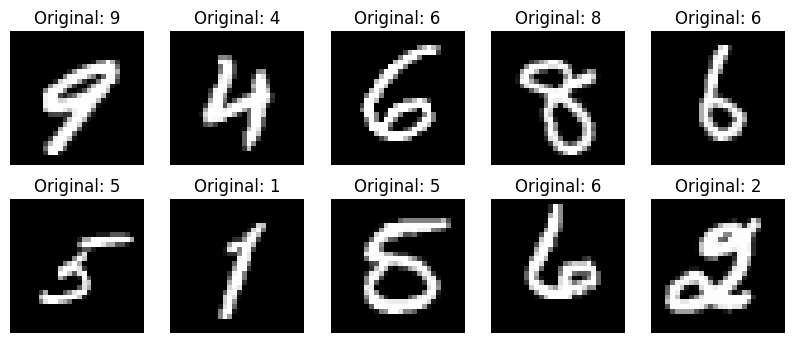

In [9]:
vis_dt(images, labels)

In [10]:
transform_augment= transforms.Compose([
    transforms.RandomRotation(degrees= 30),
    transforms.RandomVerticalFlip(),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.RandomErasing(scale=(1, 1), ratio=(5,5)),
])

In [11]:
mnist_augment_dataset = dt.MNIST(root='./data', download=True, transform = transform_augment)

In [12]:
mnist_augment_loader = DataLoader(mnist_augment_dataset, batch_size=25, shuffle = True)

In [13]:
def vis_dt(augmented_images, labels, title = 'Augmented Images'):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(10):
        ax = axes[i//5, i% 5]
        ax.imshow(augmented_images[i].squeeze().numpy(), cmap='gray')
        ax.set_title(f'Augmented: {labels[i].item()}')
        ax.axis('off')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

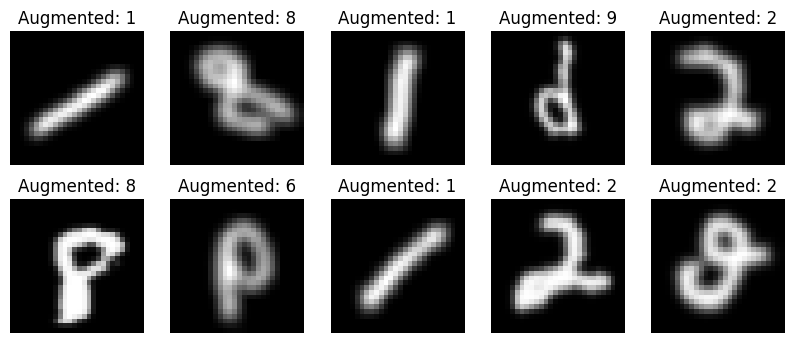

In [14]:
augmented_images, labels = next(iter(mnist_augment_loader))
vis_dt(augmented_images, labels, title= 'Augmented Images')